In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob

launch_logs = pd.DataFrame()
for path in glob.glob('launch logs/*.csv'):
    df = pd.read_csv(path,index_col=0,engine='c').sum(axis=0)
    del df['Vehicle']
    df['Year'] = int(path[12:-4])
    launch_logs=launch_logs.append(df,ignore_index=True)

nssdc_all = pd.DataFrame(columns=['Launch Date',"Spacecraft Name","NSSDCA ID","Site","Vehicle","Funder"])  
for file in glob.glob('spaceCraftquerys/*.csv'):
    df = pd.read_csv(file, parse_dates= ['Launch Date'] )
    count0 = len(df.axes[0])
    year = int(file[-8:-4])
    if year>=2021:
        continue
    nssdc_all= nssdc_all.append(df)

nssdc_all['Launch Date'] = pd.to_datetime(nssdc_all['Launch Date'], unit='D')

nssdc_unique = nssdc_all.drop_duplicates(subset=['Launch Date','Site','Vehicle'])



nssdc_all.set_index('Launch Date', inplace=True)
nssdc_unique.set_index('Launch Date', inplace=True)


nssdc_all = nssdc_all.sort_index()
nssdc_unique = nssdc_unique.sort_index()

oso = pd.read_csv('OsoIndex.csv', dtype= int, sep = ';', index_col=0)

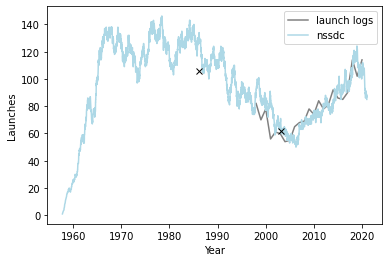

In [2]:
import matplotlib.pyplot as plt
from datetime import datetime

plt.xlabel('Year')
plt.ylabel('Launches')
plt.plot(
    pd.to_datetime(launch_logs['Year'], format = '%Y') ,launch_logs['Launches'], label='launch logs', color = 'gray')
plt.plot(
    nssdc_unique.rolling(window='365D').count().reset_index()['Launch Date'],
    nssdc_unique.rolling('365D').count()['Site'],
    label='nssdc', color = 'lightblue')

plt.plot(datetime(year=1986, month =1, day = 28),nssdc_unique[nssdc_unique.index.year == 1986].count()['Site'], marker='x', color='black')
plt.plot(datetime(year=2003, month =2, day = 1),nssdc_unique[nssdc_unique.index.year == 2003].count()['Site'], marker='x', color= 'black')


plt.legend()

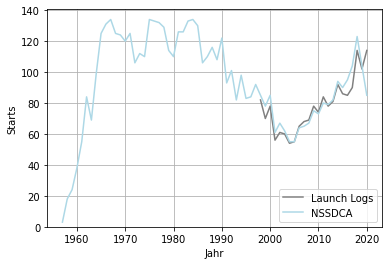

In [3]:
import matplotlib.pyplot as plt
from datetime import datetime

plt.plot(
    pd.to_datetime(launch_logs['Year'], format = '%Y') ,launch_logs['Launches'], label='Launch Logs', color = 'gray')
plt.plot(
    pd.to_datetime(nssdc_unique.index.year.unique(), format = '%Y'),
    [nssdc_unique[nssdc_unique.index.year == x].count()['Site'] for x in nssdc_unique.index.year.unique()],
    label='NSSDCA', color = 'lightblue')

# plt.plot(datetime(year=1986, month =1, day = 28),nssdc_unique[nssdc_unique.index.year == 1986].count()['Site'], marker='x', color='black')
# plt.plot(datetime(year=2003, month =2, day = 1),nssdc_unique[nssdc_unique.index.year == 2003].count()['Site'], marker='x', color= 'black')

# plt.plot([datetime(1953,1,1),datetime(2021,1,1)],[100,100], color = "lightgrey")
plt.xlabel('Jahr')
plt.ylabel('Starts')
plt.ylim(0)
plt.grid()
plt.legend()

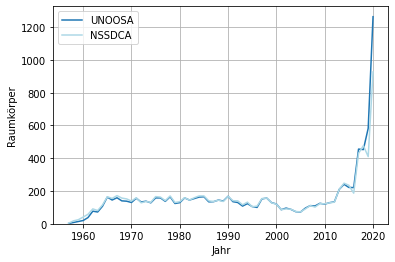

In [4]:
oso[oso.index<2021][' Count'].plot(label='UNOOSA')
plt.plot(
    nssdc_all.index.year.unique(),
    [nssdc_all[nssdc_all.index.year == x].count()['Site'] for x in nssdc_all.index.year.unique()],
    label='NSSDCA', color = 'lightblue')

plt.xlabel('Jahr')
plt.ylabel('Raumkörper')
plt.ylim(0)
plt.grid()
plt.legend()

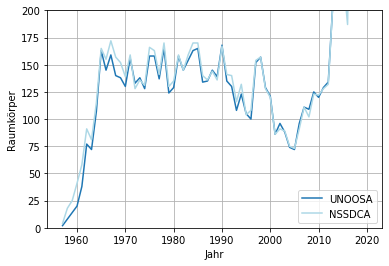

In [5]:
oso[oso.index<2021][' Count'].plot(label='UNOOSA')
plt.plot(
    nssdc_all.index.year.unique(),
    [nssdc_all[nssdc_all.index.year == x].count()['Site'] for x in nssdc_all.index.year.unique()],
    label='NSSDCA', color = 'lightblue')

plt.xlabel('Jahr')
plt.ylabel('Raumkörper')
plt.ylim(0,200)
plt.grid()
plt.legend()

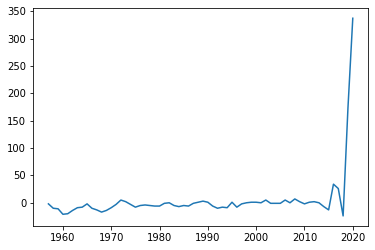

In [6]:
import numpy as np
plt.plot(nssdc_all.index.year.unique(),
    0-(np.array([nssdc_all[nssdc_all.index.year == x].count()['Site'] for x in nssdc_all.index.year.unique()])-oso[oso.index<2021].sort_index().reset_index()[' Count']))